<div class="panel panel-danger">
  <div class="panel-heading">
    <h3 class="panel-title">BREAKOUT INSTRUCTIONS</h3>
  </div>
  <div class="panel-body">
Answer the questions below. You will be asked to present your work after the breakout so make sure to indicate your answers clearly and concisely.
  </div>
</div>

Execute the following code:

0
1
2
3
4


5
6
7
8


9
10
11


12
13
14
15
16


17
18
19


20
21
22


23
24
25


26
27


28
29


30
31


32
33


34
35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


Text(0.5, 0, 'Partition balance')

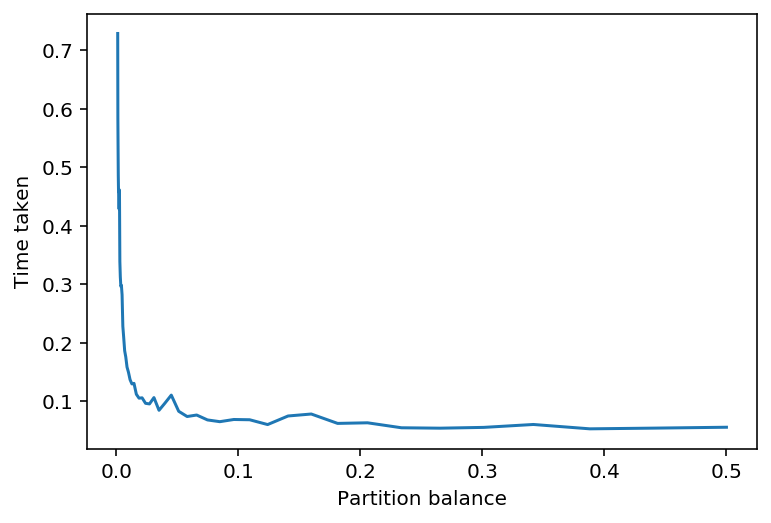

In [2]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

eps = 1e-16
N = 1000
# This variable defines how well balanced the recursive tree will be.
locations = [0.0, 0.5, 1.0 - eps]

def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    # initialising the indices list
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values_from_locations = [lst[ind] for ind in inds]
        partition = median(*values_from_locations)  


        # Split into 3 lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

def degenerate_quicksort():
    ## let's sort an already sorted list
    qsort([i for i in range(N)])


## choosing different locations for the pivots
n = np.logspace(np.log10(0.5), -np.log10(N), 50)
t = np.zeros(n.shape)
for a in range(n.size):
    print(a)
    # setting the median to be n[a]
    locations[1] = n[a]
    t[a] = timeit.timeit(degenerate_quicksort, number=10)

plt.plot(n, t)
plt.ylabel('Time taken')
plt.xlabel('Partition balance')

<span class="minerva-question" style='background-color:#d9534f;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 1</span>

What does the figure that the code produce mean? Explain your answer making reference to specific lines of code.

The figure shows the runtime for different partition values of sorted lists. We see that when the partition is at 0, we have the worst run time, and that run time improves until we reach the partition at .50 

<span class="minerva-question" style='background-color:#d9534f;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>Question 2</span>

Discuss what the code is doing.  Make sure that everyone understands what each line of the code does. Describe the main lines of code below.

```python
locations = [0.0, 0.5, 1.0 - eps]  # line 9
"""Provides the proportions of indexes that we will be picking from"""

inds = [frm + int(N * n) for n in locations]  # line 30
"""This is how we get the indexes from the proportions outlined in locations"""

locations[1] = n[a]  # line 64
"""We only adjust the middle proportion so that we can see how that affects """

```




<span class="minerva-question" style='background-color:#d9534f;padding: 5px 20px 5px 20px;line-height:30px;color:white;font-weight: bold; border-radius: 25px'>NOTE</span>

If you finish questions 1 and 2 above before the end of the breakout, write "We've finished" below.


In [0]:
"We've finished"